Euler's technique  to compute $p(n)$ in an efficient way:

The Euler formula is $$\left(1 + x+x^2 + x^3 + \cdots\right)\left( 1+ x^2 + x^4 + \cdots\right)\left(1 + x^3 + x^6+\cdots\right) = \sum_{n=1}^{\infty}p_{n}x^{n} \\ \implies \prod_{m=1}^{\infty}\left(\sum_{k=0}^{\infty}x^{mk}\right)= \sum_{n=1}^{\infty}p_{n}x^n\\ \implies \frac{1}{(1 -x)(1-x^2)(1-x^3)\cdots} = \sum_{n=1}^{\infty}p_{n}x^n$$.


Now, $(1-x)(1-x^2)(1-x^3)\cdots = 1 - x - x^2 +x^5 + x^7 - x^{12} - x^{15} + x^{22} + x^{26} -x^{35} - x^{40} + \cdots$.

Therefore, from the above relation, we get $(1- (x+x^2) + (x^5+x^7) - (x^{12} + x^{15})+\cdots)\left(1 + p_{1}x + p_{2}x^2 + p_{3}x^3 + \cdots\right)$.

Notice that, $(1 - (x+x^2) + (x^5+x^7) - (x^{12} + x^{15}) + \cdots$ = $1 + \sum_{k=1}^{\infty}(-1)^{k}\left(x^{k\frac{3k+1}{2}} + x^{k\frac{3k-1}{2}}\right)$

Hence, the coefficient of $x^{n}$ is zero in this product and so, we get $p_{n} - P_{n-1} - p_{n-2} + p_{n-5} + p_{n-7} -p_{n-12} - p_{n-15} +\cdots =0\\ p_{n} = p_{n-1} + p_{n-2} - p_{n-5} -p_{n-7} +\cdots\\$
$p_{n} = \sum_{k=1}^{n}\left(p\left(n-\frac{k(3k-1)}{2}\right) + p\left(n - \frac{k(3k+1)}{2}\right)\right)$.

With this relation, we have $p_{0}=  0 \text{ and } p_{k} = 0, \forall k <0$.

In [7]:
import time

In [1]:
### define a function to find the partition using the recursive relation

def partition(n):
    if n==0 or n==1:
        return 1
    else:
        summand = 0
        for k in range(1,n+1):
            d1 = n - int((k*(3*k-1))/2)
            d2 = n - int((k*(3*k +1))/2)
            s = pow(-1,k+1)
            summand += s*(partition(d1) + partition(d2))
    return summand


In [2]:
partition(7)

15

The idea behind this below code is taken from the paper titled "The Pentagonal Number Theorem and All That" by Dick Koch, August 26,2016.

In [1]:
def partition_euler(n):
    N = n+1
    P = [0]*N #number of series coefficients
    P[0] = 1
    P[1]=1
    pinv = [0]*N # inverse of the p(n) series
    k = 1
    ind = (k*(3*k-1))//2
    while ind <= N:
        pinv[ind] = (-1)^k
        ind = (k*(3*k+1))//2
        if ind <= N:
            pinv[ind] = (-1)^k
        k +=1 
        ind = k*(3*k-1)//2
    for n in range(2,N):
        P[n] = 0
        for i in range(1,n):
            P[n] -= P[n-i]*pinv[i]
        P[n] -= pinv[n]
        #print(f"The partition of the integer {n} is : {P[n]}")
        print(P[n])
    

In [5]:
partition_euler(100)

2
3
5
7
11
15
22
30
42
56
77
101
135
176
231
297
385
490
627
792
1002
1255
1575
1958
2436
3010
3718
4565
5604
6842
8349
10143
12310
14883
17977
21637
26015
31185
37338
44583
53174
63261
75175
89134
105558
124754
147273
173525
204226
239943
281589
329931
386155
451276
526823
614154
715220
831820
966467
1121505
1300156
1505499
1741630
2012558
2323520
2679689
3087735
3554345
4087968
4697205
5392783
6185689
7089500
8118264
9289091
10619863
12132164
13848650
15796476
18004327
20506255
23338469
26543660
30167357
34262962
38887673
44108109
49995925
56634173
64112359
72533807
82010177
92669720
104651419
118114304
133230930
150198136
169229875
190569292


In [8]:
start = time.time()
euler= partition_euler(100)
end = time.time()

2
3
5
7
11
15
22
30
42
56
77
101
135
176
231
297
385
490
627
792
1002
1255
1575
1958
2436
3010
3718
4565
5604
6842
8349
10143
12310
14883
17977
21637
26015
31185
37338
44583
53174
63261
75175
89134
105558
124754
147273
173525
204226
239943
281589
329931
386155
451276
526823
614154
715220
831820
966467
1121505
1300156
1505499
1741630
2012558
2323520
2679689
3087735
3554345
4087968
4697205
5392783
6185689
7089500
8118264
9289091
10619863
12132164
13848650
15796476
18004327
20506255
23338469
26543660
30167357
34262962
38887673
44108109
49995925
56634173
64112359
72533807
82010177
92669720
104651419
118114304
133230930
150198136
169229875
190569292


In [9]:
print(f"The time taken by the algorithm ot compute the number of partitions from 1 to 100 is", end - start)

The time taken by the algorithm ot compute the number of partitions from 1 to 100 is 0.010828495025634766


In this file add that rule by Ramanujan to comoute the partition.

**Partition of an integer:** For each integer $n$, the number of partitions is denoted by $p(n)$.

The asymptotic formula for the number of partitions of an integer $p(n)$, first obtained by $\text{G.H.Hardy}$ and $\text{Ramanujan}$ in $1918$ is as $n \to \infty$, $$p(n) \sim \frac{1}{4n\sqrt{3}}exp \left(\pi \sqrt{\frac{2n}{3}}\right)$$

In [10]:
## finding partition of an integer using inbuilt function in sagemath
# partition of integers 5,10,15,.. upto 50
n = 5
N =[n*i for i in range(1,11)]
p_n_val = []
for val in N:
    parts = Partitions(val)
    p_n_val.append(parts.cardinality())
    

In [11]:
p_n_val

[7, 42, 176, 627, 1958, 5604, 14883, 37338, 89134, 204226]

In [20]:
## finding partition of an integer using inbuilt function in sagemath

n = 1
N =[n*i for i in range(2,101)]
partition_val = []
strt = time.time()
for val in N:
    parts = Partitions(val)
    partition_val.append(parts.cardinality())
end = time.time()
print(f"taken time is", end - strt)

taken time is 0.001569509506225586


In [23]:
partition_val

[2,
 3,
 5,
 7,
 11,
 15,
 22,
 30,
 42,
 56,
 77,
 101,
 135,
 176,
 231,
 297,
 385,
 490,
 627,
 792,
 1002,
 1255,
 1575,
 1958,
 2436,
 3010,
 3718,
 4565,
 5604,
 6842,
 8349,
 10143,
 12310,
 14883,
 17977,
 21637,
 26015,
 31185,
 37338,
 44583,
 53174,
 63261,
 75175,
 89134,
 105558,
 124754,
 147273,
 173525,
 204226,
 239943,
 281589,
 329931,
 386155,
 451276,
 526823,
 614154,
 715220,
 831820,
 966467,
 1121505,
 1300156,
 1505499,
 1741630,
 2012558,
 2323520,
 2679689,
 3087735,
 3554345,
 4087968,
 4697205,
 5392783,
 6185689,
 7089500,
 8118264,
 9289091,
 10619863,
 12132164,
 13848650,
 15796476,
 18004327,
 20506255,
 23338469,
 26543660,
 30167357,
 34262962,
 38887673,
 44108109,
 49995925,
 56634173,
 64112359,
 72533807,
 82010177,
 92669720,
 104651419,
 118114304,
 133230930,
 150198136,
 169229875,
 190569292]

In [14]:
def Ramanujan_approximation(n):
    return ((1/(4*n*sqrt(3)))*exp(pi*sqrt((2*n)/3))).n()

In [15]:
approx_partition = []
for val in N:
    temp = Ramanujan_approximation(val)
    approx_partition.append(temp)

In [16]:
approx_partition

[2.71516043156120,
 4.09051199362822,
 6.10009566640572,
 8.94145914916488,
 12.8819271444175,
 18.2671640659623,
 25.5376902463842,
 35.2502950057611,
 48.1043088172208,
 64.9733603364109,
 86.9435207512862,
 115.358940483292,
 151.876282240109,
 198.529471321460,
 257.806528376833,
 332.740527729038,
 427.017041408995,
 545.100790815855,
 692.384640509500,
 875.364538793732,
 1101.84454496583,
 1381.17669178418,
 1724.54112322839,
 2145.27273249647,
 2659.24141514036,
 3285.29406040309,
 4045.76754483562,
 4967.08328248773,
 6080.43534361637,
 7422.58579925793,
 9036.78280480466,
 10973.8190271044,
 13293.2503746035,
 16064.7976398448,
 19369.9566428462,
 23303.8458110022,
 27977.3238888516,
 33519.4146867301,
 40080.0805034790,
 47833.3911532337,
 56981.1414543343,
 67756.9766709556,
 80431.0928141341,
 95315.5869958119,
 112770.542283893,
 133210.941834797,
 157114.518600422,
 185030.659748911,
 217590.499246580,
 255518.347980225,
 299644.628529203,
 350920.501417484,
 410434.3915

In [18]:
import matplotlib.pyplot as plt

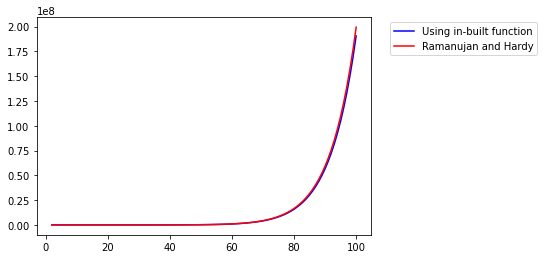

In [24]:
plt.plot(N,partition_val,c="b",label ="Using in-built function")
plt.plot(N,approx_partition,c = "r",label ="Ramanujan and Hardy")
plt.legend(bbox_to_anchor =(1.04,1));